# Bandit Problem

In [61]:
# imports
from bandits import Bandit
import random
import numpy as np 
import matplotlib.pyplot as plt

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [62]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [63]:
bandits[0].pullLever()

-0.385643207935339

## Greedy algorithm Implementation

In [64]:
def run_greedy():
    q = np.zeros(10)
    n = np.zeros(10)
    rewards = np.zeros(1000)
    for t in range(1000):
        i = np.argmax(q)
        r = bandits[i].pullLever()
        n[i] += 1
        q[i] += (r-q[i])/n[i]
        rewards[t] = r
    return rewards

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

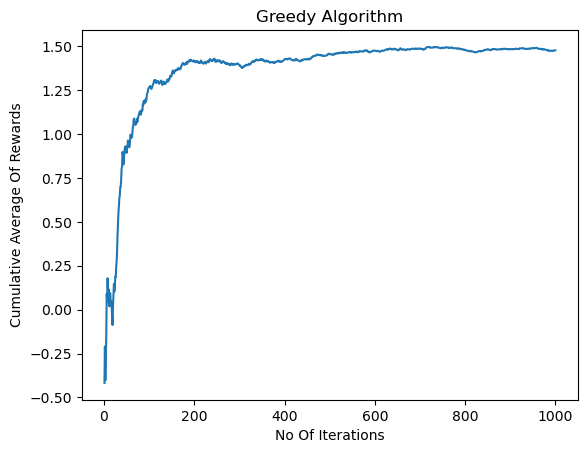

In [ ]:
rewards = run_greedy()
x = np.arange(1,1001)
cumsum = np.cumsum(rewards)
y = cumsum / x
plt.plot(x, y)
plt.xlabel("No Of Iterations")
plt.ylabel("Cumulative Average Of Rewards")
plt.title("Greedy Algorithm")
plt.show()

## $\epsilon$-greedy Algorithm

In [ ]:
def run_epsilon_greedy(e):
    q = np.zeros(10)
    n = np.zeros(10)
    rewards = np.zeros(1000)
    for t in range(1000):
        rng = np.random.default_rng()
        p = rng.random()
        if(p>e):
            i = np.argmax(q)
            r = bandits[i].pullLever()
            n[i] += 1
            q[i] += (r-q[i])/n[i]
            rewards[t] = r
        else:
            j = rng.integers(0,10)
            r = bandits[j].pullLever()
            n[j] += 1
            q[j] += (r-q[j]) / n[j]
            rewards[t] = r
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

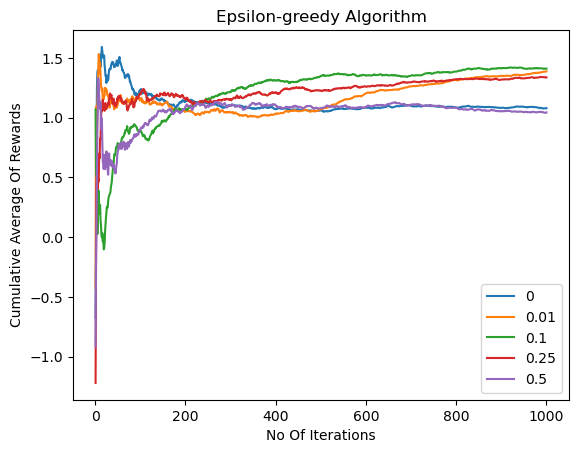

In [67]:
x = np.arange(1,1001)
epsilons = [0, 0.01, 0.1, 0.25, 0.5]
for e in epsilons:
    rewards = run_epsilon_greedy(e)
    cumsum = np.cumsum(rewards)
    y = cumsum / x
    plt.plot(x, y, label = e)
plt.xlabel("No Of Iterations")
plt.ylabel("Cumulative Average Of Rewards")
plt.title("Epsilon-greedy Algorithm")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

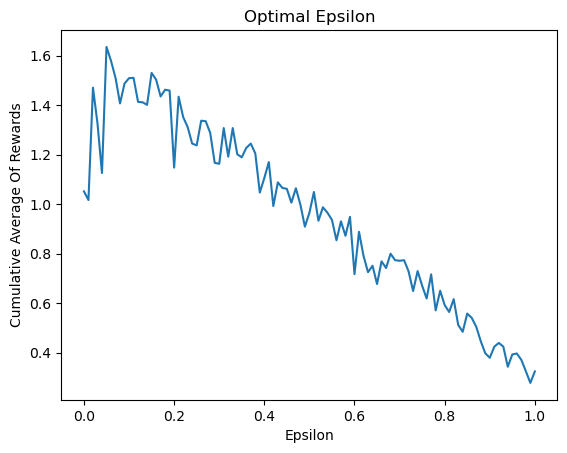

Optimal Epsilon is:  0.05


In [68]:
x = np.linspace(0, 1, 101)
y = np.array([np.sum(run_epsilon_greedy(e)) / 1000 for e in x])
plt.plot(x, y)
plt.xlabel("Epsilon")
plt.ylabel("Cumulative Average Of Rewards")
plt.title("Optimal Epsilon")
plt.show()
print("Optimal Epsilon is: ", x[y.argmax()])

## Optimistic Initial Values

In [ ]:
def run_optimistic_greedy():
    q = np.ones(10) * 10
    n = np.zeros(10)
    rewards = np.zeros(1000)
    for t in range(1000):
        i = np.argmax(q)
        r = bandits[i].pullLever()
        n[i] += 1
        q[i] += (r-q[i]) / n[i]
        rewards[t] = r
    return rewards
    

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

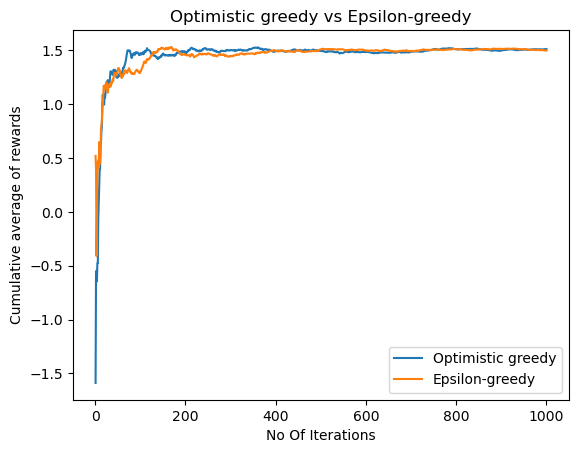

In [75]:
rewards = run_greedy()
x = np.arange(1,1001)
cumsum = np.cumsum(rewards)
y = cumsum / x
rewardsOpt = run_optimistic_greedy()
cumsumOpt = np.cumsum(rewardsOpt)
z = cumsumOpt / x
plt.plot(x, y, label = "Optimistic greedy")
plt.plot(x, z, label = "Epsilon-greedy")
plt.xlabel("No Of Iterations")
plt.ylabel("Cumulative average of rewards")
plt.title("Optimistic greedy vs Epsilon-greedy")
plt.legend()
plt.show()

## Upper Confidence Bound (UCB)

In [78]:
def run_ucb(c):
    q = np.zeros(10)
    n = np.zeros(10)
    rewards = np.zeros(1000)
    for t in range(1000):
        ucb = np.zeros(10)
        for i in range(10):
            if n[i] == 0:
                ucb[i] = np.inf
            else:
                ucb[i] = q[i] + c * np.sqrt(np.log(t)/n[i])
        i = np.argmax(ucb)
        r = bandits[i].pullLever()
        n[i] += 1
        q[i] += (r - q[i]) / n[i]
        rewards[t] = r
    return rewards


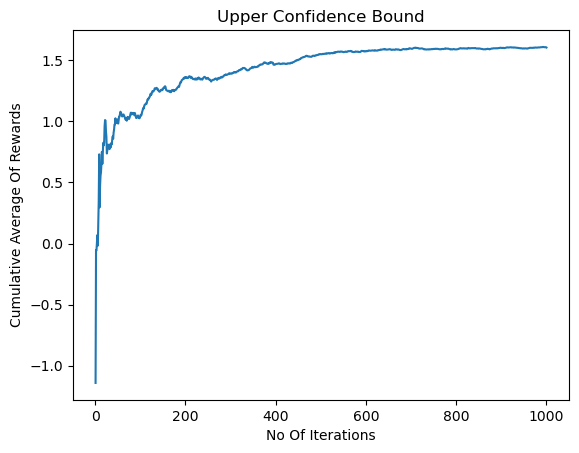

In [79]:
rewards = run_ucb(2)
x = np.arange(1,1001)
cumsum = np.cumsum(rewards)
y = cumsum / x
plt.plot(x, y)
plt.xlabel("No Of Iterations")
plt.ylabel("Cumulative Average Of Rewards")
plt.title("Upper Confidence Bound")
plt.show()